In [1]:
!git clone https://github.com/Legal-NLP-EkStep/rhetorical-role-baseline.git

Cloning into 'rhetorical-role-baseline'...
remote: Enumerating objects: 557, done.
remote: Counting objects: 100% (557/557), done.
remote: Compressing objects: 100% (242/242), done.
remote: Total 557 (delta 305), reused 538 (delta 300), pack-reused 0
Receiving objects: 100% (557/557), 885.87 KiB | 6.11 MiB/s, done.
Resolving deltas: 100% (305/305), done.


In [2]:
!wget https://storage.googleapis.com/indianlegalbert/OPEN_SOURCED_FILES/Rhetorical_Role_Benchmark/Data/train.json

--2022-11-29 21:21:23--  https://storage.googleapis.com/indianlegalbert/OPEN_SOURCED_FILES/Rhetorical_Role_Benchmark/Data/train.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.251.33.208, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13645789 (13M) [application/json]
Saving to: ‘train.json’

train.json          100%[===================>]  13.01M  34.6MB/s    in 0.4s    

2022-11-29 21:21:23 (34.6 MB/s) - ‘train.json’ saved [13645789/13645789]



In [3]:
!wget https://storage.googleapis.com/indianlegalbert/OPEN_SOURCED_FILES/Rhetorical_Role_Benchmark/Data/dev.json

--2022-11-29 21:21:23--  https://storage.googleapis.com/indianlegalbert/OPEN_SOURCED_FILES/Rhetorical_Role_Benchmark/Data/dev.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.251.33.208, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1265870 (1.2M) [application/json]
Saving to: ‘dev.json’

dev.json            100%[===================>]   1.21M  5.57MB/s    in 0.2s    

2022-11-29 21:21:24 (5.57 MB/s) - ‘dev.json’ saved [1265870/1265870]



In [4]:
import json
train = json.load(open('train.json'))
dev = json.load(open('dev.json'))

In [5]:
def clean_text(text):
    return text.strip()

In [6]:
labels_all=[]
data=[]

for i in train:
  for annotations in i['annotations']:
    for results in annotations['result']:
      data.append(clean_text(results['value']['text']))
      labels_all.append(results['value']['labels'][0])
  

In [7]:
len(labels_all)

28986

In [8]:
for i in [1, 100, 1000, 2000, 5000]:
    print(data[i])
    print(labels_all[i])
    print('--' * 20)

BEFORE

THE HON'BLE MR.JUSTICE ANAND BYRAREDDY

      CRIMINAL APPEAL NO.3532 OF 2012

BETWEEN:                                            R

Babu S/o Siddappa,                         .. APPELLANT
Age: 30 Years, Occ: Household,
R/o: Sunthan Village,
Taluk Chincholi,
District Gulbarga.

(By Shri Ishwar Raj S.Chowdapur, Advocate)

AND:

The State of Karnataka                     .. RESPONDENT
(Through Ratkal Police Station)
Represented by Additional State
Public Prosecutor, Circuit Bench,
Gulbarga.

(By Shri S.S.Aspalli, Government Pleader)
PREAMBLE
----------------------------------------
The Appellants-Revenue have filed this appeal u/s.260A of the Income Tax Act, 1961, raising purportedly certain substantial questions of law arising from the order of the ITAT, Bangalore Bench `B', Bangalore, dated 25.01.2017 passed in IT(TP)A No.191/Bang/2015 (Dy.Commissioner of Income Tax vs. M/s.Tesco Hindustan Service Centre Pvt. Ltd.,) for A.Y.2010-11.
 2.
FAC
------------------------------------

In [9]:
!pip install transformers

In [10]:
!pip install -U sentence-transformers

In [11]:
from transformers import AutoTokenizer, AutoModel, AutoConfig
import numpy as np
import torch
from torch.nn.functional import normalize

/home/grads/r/rohan.chaudhury/miniconda3/envs/nlpproj/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
# tokenizer_labse = AutoTokenizer.from_pretrained("setu4993/LaBSE")
# model_labse = AutoModel.from_pretrained("setu4993/LaBSE")

In [13]:
from sentence_transformers import SentenceTransformer

In [14]:
model = SentenceTransformer('sentence-transformers/paraphrase-xlm-r-multilingual-v1')

In [15]:
# def get_embeddings(sentece):
#     tokenized = tokenizer_labse(sentece,
#                                 return_tensors="pt",
#                                 padding=True)
#     with torch.no_grad():
#         embeddings = model_labse(**tokenized)
    
#     return np.squeeze(np.array(embeddings.pooler_output))

def get_embeddings(sentence):
  return model.encode(sentence)

In [16]:
TRAIN_SIZE = len(labels_all)
print(TRAIN_SIZE)

28986


In [17]:
try:
    X=np.load('train_Embedding.npy')
    y=np.load('labels.npy')
    labels = list(set(labels_all))
except:
    X = []
    labels = list(set(labels_all))
    y = []
    progress = 0
    for sentence, label in zip(data[:TRAIN_SIZE],
                            labels_all[:TRAIN_SIZE]):
        X.append(get_embeddings(sentence))
        y.append(labels.index(label))
        progress += 1
        # print(progress)
        if progress % 500 == 0:
            print('Progress Percent = {}%'.format(100 * progress / TRAIN_SIZE))


Progress Percent = 1.7249706754985166%
Progress Percent = 3.449941350997033%
Progress Percent = 5.17491202649555%
Progress Percent = 6.899882701994066%
Progress Percent = 8.624853377492583%
Progress Percent = 10.3498240529911%
Progress Percent = 12.074794728489616%
Progress Percent = 13.799765403988133%
Progress Percent = 15.52473607948665%
Progress Percent = 17.249706754985166%
Progress Percent = 18.97467743048368%
Progress Percent = 20.6996481059822%
Progress Percent = 22.424618781480714%
Progress Percent = 24.149589456979232%
Progress Percent = 25.874560132477747%
Progress Percent = 27.599530807976265%
Progress Percent = 29.32450148347478%
Progress Percent = 31.0494721589733%
Progress Percent = 32.77444283447181%
Progress Percent = 34.49941350997033%
Progress Percent = 36.22438418546885%
Progress Percent = 37.94935486096736%
Progress Percent = 39.67432553646588%
Progress Percent = 41.3992962119644%
Progress Percent = 43.124266887462916%
Progress Percent = 44.84923756296143%
Progress

In [18]:

with open('train_Embedding.npy', 'wb') as f:
    np.save(f, X)
with open('labels.npy', 'wb') as f:
    np.save(f, y)

In [19]:
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

(28986, 768) (28986,)


In [20]:
for i in [2000]:
    print(data[i])
    print(X[i])
    print(labels_all[i])
    print(y[i])
    print('--' * 20)

Though the Investigating Officer has stated in his evidence that he made efforts to collect natural handwriting of the deceased, but he could not do so, he has not explained as to what steps he had taken to get natural handwriting of the deceased.
[ 1.11927010e-01  5.68731315e-02  1.21323373e-02 -1.87874839e-01
  1.93472743e-01  3.32868308e-01  1.34035647e-01  1.14930287e-01
  2.38395140e-01 -4.29469496e-01  2.32661903e-01 -2.48115212e-01
 -7.07528787e-03  3.23059618e-01  2.46548150e-02 -3.19976866e-01
 -1.51403025e-01 -6.46272749e-02 -5.05898483e-02 -3.24432254e-01
 -3.79874319e-01 -4.17860121e-01 -1.73265859e-01 -5.15729608e-03
 -1.40824199e-01  4.48657311e-02 -2.44619787e-01  3.24763238e-01
 -1.55558541e-01 -1.22190729e-01 -2.26484716e-01  3.96179706e-01
  2.13164072e-02  1.04821235e-01  6.01108782e-02  6.32411540e-02
 -3.62210013e-02 -3.95035185e-02  2.26233453e-01 -1.45533616e-02
 -1.36159465e-01  2.03020290e-01 -2.37649009e-01  4.17533547e-01
 -3.29919428e-01  6.63179904e-02 -2.6

In [21]:
!pip install https://github.com/sadrasabouri/plda/tarball/master

In [22]:
import plda

In [23]:
PLDA_classifier = plda.Classifier()
PLDA_classifier.fit_model(np.array(X),
                          np.array(y))

In [24]:
def predict_doc(query):
    query_embedding = get_embeddings(query)
    predictions, log_p_predictions = PLDA_classifier.predict(query_embedding)
    return labels[predictions]

In [25]:
labels_all_dev=[]
data_dev=[]

for i in dev:
  for annotations in i['annotations']:
    for results in annotations['result']:
      data_dev.append(clean_text(results['value']['text']))
      labels_all_dev.append(results['value']['labels'][0])

In [26]:
def predict_doc_at(query):
    query_embedding = get_embeddings(query)
    predictions, log_p_predictions = PLDA_classifier.predict(query_embedding)
    
    predictions = labels[predictions]
    return predictions

In [27]:
preds_dev=[]
for query in data_dev:
    preds = predict_doc_at(query)
    preds_dev.append(preds)

In [28]:
from sklearn.metrics import f1_score

In [29]:
f1score=f1_score(labels_all_dev, preds_dev, average="macro")

In [30]:
f1score

0.39319976447977234

In [31]:
!conda install seaborn -y

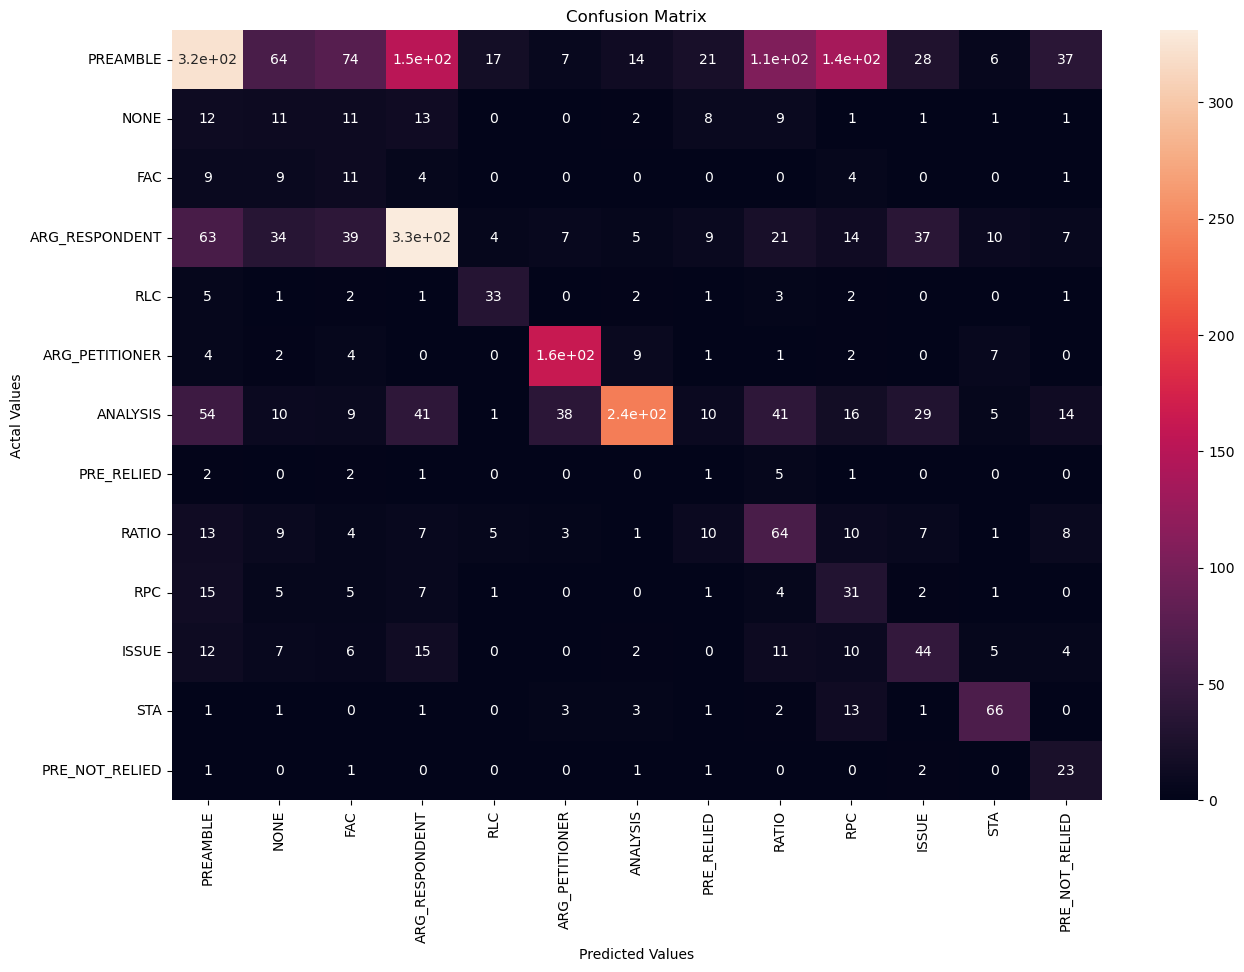

In [32]:
matches=0
all=0
for i,j in zip(labels_all_dev, preds_dev):
  if i==j:
    matches+=1
  all+=1

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
cm = confusion_matrix(labels_all_dev, preds_dev)

cm_df = pd.DataFrame(cm,
                     index = ['PREAMBLE', 'NONE', 'FAC', 'ARG_RESPONDENT', 'RLC', 'ARG_PETITIONER', 'ANALYSIS', 'PRE_RELIED', 'RATIO', 'RPC', 'ISSUE', 'STA', 'PRE_NOT_RELIED'], 
                     columns = ['PREAMBLE', 'NONE', 'FAC', 'ARG_RESPONDENT', 'RLC', 'ARG_PETITIONER', 'ANALYSIS', 'PRE_RELIED', 'RATIO', 'RPC', 'ISSUE', 'STA', 'PRE_NOT_RELIED'])

plt.figure(figsize=(15,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [33]:
prec=matches/all

In [34]:
prec

0.46401384083044983

In [35]:
# def predict_doc_at_cosine(query):
#     query_embedding = get_embeddings(query)
#     predictions = PLDA_classifier.predict(query_embedding)
    
#     predictions = labels[predictions]
#     return predictions

In [36]:
# preds_dev_cosine=[]
# for query in data_dev:
#     preds = predict_doc_at(query)
#     preds_dev_cosine.append(preds)

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
from numpy.core.fromnumeric import argmax

In [38]:
# !conda install -c conda-forge faiss-gpu cudatoolkit=10.1 -y

In [39]:
import faiss

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [40]:
nclusters=len(labels)
print(nclusters)
dimension=X.shape[1]
num_vectors=X.shape[0]
print(dimension)
print(num_vectors)

13
768
28986


In [41]:
quantiser = faiss.IndexFlatL2(dimension)  
index = faiss.IndexIVFFlat(quantiser, dimension, nclusters,faiss.METRIC_L2)

In [42]:
print(index.is_trained)   # False
index.train(X)  # train on the database vectors
print(index.ntotal)   # 0
index.add(X)   # add the vectors and update the index
print(index.is_trained)  # True
print(index.ntotal)   

False
0
True
28986


In [43]:
nprobe = 3  # find 3 most similar clusters

k = 1  # return 1 nearest neighbours
 

# distances, indices = index.search(query_vectors, k)

In [44]:

try:
  if embs_dev is None:

    embs_dev=[]

    for i in data_dev:
      embs_dev.append(get_embeddings(i))
except:
  embs_dev=[]

  for i in data_dev:
    embs_dev.append(get_embeddings(i))

In [45]:
embs_dev=np.array(embs_dev)
embs_dev.shape

(2890, 768)

In [46]:
distances, indices = index.search(embs_dev, k)

In [47]:
# print(distances)
# print(indices)

In [48]:
indices.shape

(2890, 1)

In [49]:
preds_cos=[]
for i in indices:
    preds_cos.append(labels[y[i[0]]])


In [50]:
# preds_cos=[]
# # que_scores=[]
# progress=0
# dev_size=len(data_dev)

# embs_dev=[]

# for i in data_dev:
#   embs_dev.append(get_embeddings(i))

# print("embeddings calculated")
# for emb_dev in embs_dev:
#   emb_score=[]
#   for emb in X:
#     emb_score.append(cosine_similarity(emb.reshape(1, -1),emb_dev.reshape(1, -1))[0][0])
#   preds_cos.append(labels[y[argmax(emb_score)]]) 
#     # if y[argmax(emb_score)]!=10:
#     # print(argmax(emb_score))
#   progress += 1
#   if progress % 500 == 0:
#       print('Progress Percent = {}%'.format(100 * progress / dev_size))

In [51]:
from sklearn.metrics import f1_score
f1score=f1_score(labels_all_dev, preds_cos, average="macro")

In [52]:
f1score

0.3329157145830798

In [53]:
matches=0
all=0
for i,j in zip(labels_all_dev, preds_cos):
  if i==j:
    matches+=1
  # else:
  #   print("i: "+i)
  #   print("j: "+ j)
  #   print("--------------")
  all+=1

In [54]:
prec=matches/all

In [55]:
prec

0.4598615916955017

In [56]:


# !pip install gradio==2.6.0
# import gradio as gr
# import requests
# import json

# !pip install --upgrade spacy
# !pip install allennlp
# !pip install --upgrade google-cloud-storage
# !pip install --upgrade google-api-core
# !pip install --upgrade google-auth
# !pip install --upgrade google-cloud-core

# !git clone https://github.com/Legal-NLP-EkStep/rhetorical-role-baseline.git
# #!pip install -r rhetorical-role-baseline/requirements_colab.txt
# !python -m spacy download en_core_web_trf
# !pip install --upgrade huggingface-hub

# %cd rhetorical-role-baseline
# ######## download model file
# model_url = 'https://storage.googleapis.com/indianlegalbert/OPEN_SOURCED_FILES/Rhetorical_Role_Benchmark/Model/model.pt'
# model = requests.get(model_url).content
# with open("datasets/model.pt", "wb") as file:
#     file.write(model)

# from data_prep import split_preamble_judgement
# from SummaryGeneration import SummaryGeneration
# def concatenate_text_by_rhetorical_role(annotation_list):
#     #### concatenate text for each rhetorical role
#     rhetorical_rolewise_text = {} # keys are rhetorical roles and value is concatenated text
#     for annotation in annotation_list:
#       sent_role = annotation['value']['labels'][0]
#       sent_txt = annotation['value']['text'].strip()
#       if rhetorical_rolewise_text.get(sent_role) is None:
#         rhetorical_rolewise_text[sent_role] = sent_txt
#       else:
#         if not rhetorical_rolewise_text[sent_role].endswith('.'):
#           rhetorical_rolewise_text[sent_role] = rhetorical_rolewise_text[sent_role] + '. '+ sent_txt
#         else:
#           rhetorical_rolewise_text[sent_role] = rhetorical_rolewise_text[sent_role] + ' '+ sent_txt
#     return rhetorical_rolewise_text

# def predict_rhetorical_roles_and_create_summary(input_txt):

#     if input_txt == '''                                                         REPORTABLE\n\n  IN THE SUPREME COURT OF INDIA\n CRIMINAL APPELLATE JURISDICTION\n\nCRIMINAL APPEAL NO. 1053 OF 2016\n\nNARESH KUMAR alias NITU                            ..........APPELLANT\n                                                   ......RESPONDENT\n                                           Versus\nSTATE OF HIMACHAL PRADESH\n\n                                       JUDGMENT\n NAVIN SINHA, J.\n The acquittal of the appellant by the Special Judge, Shimla in Sessions Trial No.7-S/7/2012, from the charge under Sections 20 and 61 of the Narcotic Drugs and Psychotropic Substances Act, 1985 (hereinafter referred as `the Act') has been reversed by the High Court. The appellant has been sentenced to fifteen years imprisonment and fine of Rs.2,00,000/-. Thus the present appeal.\n 2. The appellant is stated to have been apprehended at Majhotli, by the police party, on suspicion, at about 6.15 A.M.\nafter he disembarked from the State public transport bus going from Nerwa to Chamunda. Two kilograms of Charas is stated to have been recovered from a bag in his possession in presence of PW-2, Sita Ram an independent witness. DW-1 Shayam Singh, the depot in-charge at Nerwa, and DW-2 Khem Raj, the conductor of the bus in question were examined as defence witnesses.\n 3. After consideration of the entirety of the evidence, particularly that of PW-2 and DW-2, and also noticing that PW-1, Constable Rakesh Kumar, an eye-witness to the incident, had not been mentioned as a witness in the seizure memo Exhibit PW-1/B, the Special Judge opined that two theories had emerged with regard to the accusations against the appellant. The appellant was acquitted, giving him the benefit of doubt.\n 4. The High Court reversed the acquittal, holding that PW-2 had admitted his signatures on Exhibit PW-1/B, the bag along with the narcotic, Ex.PW-2/A seal impression, Ex.PW-2/D the arrest memo and the Ex.PW-2/E personal search memo. No complaint had been lodged by the witness that he had been compelled by the police to sign the documents under pressure.\nThe statements of the official witnesses, PW-1 Rakesh Kumar and PW-6 Head Constable Parmanand, were trustworthy, inspiring confidence, and could not be rejected only on the ground that they were police personnel. Any discrepancy with regard to distance and travelling time between Nerwa and Majhotli could be attributed to memory loss with passage of time, and was not required to be with mathematical precision. The time with regard to purchase of bus ticket had not been established.\n 5. Learned counsel for the appellant submits that he has been falsely implicated. He was deboarded from the bus at Chopal after it arrived from Majhotli and the narcotics planted on him. There had been no recovery from him. The bus ticket evidently reveals that he boarded the bus at 6:51 A.M. The question of his being apprehended at 6:15 A.M. simply does not arise. The road distance from Nerwa to Majhotli was 26 kms. as deposed by DW-1. In the hills, it would have taken the bus at least one hour or more, to cover this distance. The bus could not have reached Majhotli till 8:00 A.M. or thereafter. PW-2, the independent witness, deposed that he was stopped by the police at about 10.30 A.M. at Majhotli and after checking his motor cycle papers was allowed to leave. He was called to the Police Station at 1.00 P.M. and asked to put his signatures on certain documents. The witness denied any search, seizure and recovery from the appellant in his presence. If an independent witness was available, and relied upon by the prosecution, his evidence could not be discarded without reason, to hold that the police version was the truth. Additional submissions were made with regard to non-compliance with Section 50 of the Act, as there was personal search also, and that the complainant himself could not be the investigating officer. Reliance was placed on Basappa vs. State of Karnataka, 2014 (5) SCC 154 that if two views were possible, the acquittal ought not to have been interfered with in appeal.\n 6. We have considered the submissions on behalf of the parties, and also examined the evidence and other materials on record.\n 7. The public bus, on which the appellant was traveling, was going from Nerwa to Chamunda. The ticket issued to the appellant Exhibit DX, proved by the bus Conductor DW-2, bears the time of issuance 6.51 A.M., visible to the naked eye. The distance from Nerwa to Majhotli, is 26 kms. as deposed by DW-1.\nWe find substance in the submission on behalf of the appellant, that the travelling time for the bus, in the hills, for this distance would be one hour or more. Prima facie, the prosecution story that the appellant was apprehended at Majhotli at 6.15 A.M.\nbecomes seriously doubtful if not impossible. The bus would have reached Majhotli at about 8.00 A.M. or thereafter only. The conclusion of the High Court that passage of time, and memory loss, were sufficient explanation for the time difference, is held to be perverse, and without proper consideration of Exhibit DX.\nPW-2, the independent witness has stated that he was stopped at Majhotli by the police at 10.30 A.M. and was allowed to leave after verification of his motor cycle papers. The witness has specifically denied that the appellant was apprehended in his presence and that any search, seizure and recovery was conducted in his presence. He had deposed that he was called to the police station at 1:00 P.M. and asked to sign the papers. The witness was declared hostile. This aspect has not been considered by the High Court, which proceeded on the only assumption that the signatures were admitted.\n 8. In a case of sudden recovery, independent witness may not be available. But if an independent witness is available, and the prosecution initially seeks to rely upon him, it cannot suddenly discard the witness because it finds him inconvenient, and place reliance upon police witnesses only. In the stringent nature of the provisions of the Act, the reverse burden of proof, the presumption of culpability under Section 35, and the presumption against the accused under Section 54, any reliance upon Section 114 of the Evidence Act in the facts of the present case, can only be at the risk of a fair trial to the accused.\nKaramjit Singh vs. State (Delhi Administration), AIR 2003 SC 1311, is distinguishable on its facts as independent witness had refused to sign because of the fear of terrorists. Likewise S.\n Jeevananthanan vs. State, 2004(5) SCC 230, also does not appear to be a case where independent witnesses were available.\n 9. The presumption against the accused of culpability under Section 35, and under Section 54 of the Act to explain possession satisfactorily, are rebuttable. It does not dispense with the obligation of the prosecution to prove the charge beyond all reasonable doubt. The presumptive provision with reverse burden of proof, does not sanction conviction on basis of preponderance of probability. Section 35 (2) provides that a fact can be said to have been proved if it is established beyond reasonable doubt and not on preponderance of probability. That the right of the accused to a fair trial could not be whittled down under the Act was considered in Noor Aga vs. State of Punjab, (2008) 16 SCC 417, observing:- \"58......An initial burden exists upon the prosecution and only when it stands satisfied, would the legal burden shift. Even then, the standard of proof required for the accused to prove his innocence is not as high as that of the prosecution. Whereas the standard of proof required to prove the guilt of the accused on the prosecution is \"beyond all reasonable doubt\" but it is \"preponderance of probability\" on the accused. If the prosecution fails to prove the foundational facts so as to attract the rigours of Section 35 of the Act, the actus reus which is possession of contraband by the accused cannot be said to have been established.\n 59. With a view to bring within its purview the requirements of Section 54 of the Act, element of possession of the contraband was essential so as to shift the burden on the accused. The provisions being exceptions to the general rule, the generality thereof would continue to be operative, namely, the element of possession will have to be proved beyond reasonable doubt.\"\n 10. In the facts of the present case, and the nature of evidence as discussed, the prosecution had failed to establish the foundational facts beyond all reasonable doubt. The special judge committed no error in acquitting the appellant. The High Court ought not to have interfered with the same. The submissions regarding non-compliance with Section 50 of the Act, or that the complainant could not be the investigating officer are not considered necessary to deal with in the facts of the case.\n 11. In Basappa (supra), it was observed that the High Court before setting aside an order of acquittal was required to record a finding that the conclusions of the Trial Court were so perverse and wholly unreasonable, so as not to be a plausible view by misreading and incorrect appreciation of evidence. The conclusions of the High Court in the facts of the present case are more speculative, based on conjectures and surmises, contrary to the weight of the evidence on record.\n 12. The order of the High Court is set aside. The acquittal of the appellant ordered by the Special Judge is restored. The appellant is set at liberty forthwith, unless wanted in any other case. The appeal is allowed.\n ........................................J.\n                             (L. Nageswara Rao) .......................................J.\n                                     (Navin Sinha) New Delhi, July 27, 2017''':
#       predefined_summary = requests.get('https://storage.googleapis.com/indianlegalbert/Rhetorical%20role/experiments/predefined_summary.txt').text
#       predefined_rhet_roles =  requests.get('https://storage.googleapis.com/indianlegalbert/Rhetorical%20role/experiments/predefined_rhet.json').json()
#       return predefined_summary,predefined_rhet_roles

#     preamble_txt,preamble_removed_txt  = split_preamble_judgement(input_txt)
#     cleaned_text = preamble_txt + preamble_removed_txt
#     custom_data = [  {"id": 1,"data": { "text": cleaned_text }}]
#     with open('datasets/custom_data.json','w') as file:
#       json.dump(custom_data,file)
    
#     !python infer_data_prep.py datasets/custom_data.json datasets/custom_processed_data.json
#     !python infer_new.py datasets/custom_processed_data.json datasets/custom_output.json datasets/model.pt

#     predictions = json.load(open('datasets/custom_output.json'))
#     sent_tags = []
#     annotation_list = predictions[0]['annotations'][0]['result']
#     for i,annotation in enumerate(annotation_list):
#       sent_tags.append((annotation['value']['text'],annotation['value']['labels'][0]))
#       if i < len(annotation_list)-1 and annotation_list[i+1]['value']['start'] > annotation['value']['end']:
#         sent_tags.append((cleaned_text[annotation['value']['end'] :annotation_list[i+1]['value']['start']],None))

#     ##### create summary for each rhetorical role
#     rheotrical_roles_to_summarize = ['FAC','RLC','ISSUE','ARG_PETITIONER','ARG_RESPONDENT','ANALYSIS','PRECEDENT_RELIED','PRECEDENT_NOT_RELIED','STA','RATIO','RPC']
    
#     try:
#       rhetorical_rolewise_text = concatenate_text_by_rhetorical_role(annotation_list)
#       legal_summarizer = SummaryGeneration(model="nsi319/legal-pegasus", tokenizer="nsi319/legal-pegasus")
      
#       generated_summaries_dict={} ##### key is rhetorical role and value is dict of {"summary":'fdsf...', "is_summarized":True}
#       for rhet_role, rhet_text in rhetorical_rolewise_text.items():
#         ######## create summary only if the text is long enough
#         if len(rhet_text)>1000:
#           generated_summaries = legal_summarizer.generate(rhet_text, token_max_length=1024)
#           generated_summaries_dict[rhet_role] = {"summary":generated_summaries[0]["level_1_summary"],"is_summarized":True}
#         else:
#           generated_summaries_dict[rhet_role] = {"summary":rhet_text,"is_summarized":False}
#       final_summary=''
#       for rhetorical_role in rheotrical_roles_to_summarize:
#         if generated_summaries_dict.get(rhetorical_role) is not None:
#           final_summary = final_summary + '#'*30+'\n' +rhetorical_role +" SUMMARY:\n" + generated_summaries_dict[rhetorical_role]['summary']+ "\n"+ '#'*30+'\n'
#     except Exception as e:
#       final_summary = "ERROR in creating summary, please try again.\n Error Description:" + str(e)

#     return final_summary,sent_tags

# input_txt = '''                                                         REPORTABLE\n\n  IN THE SUPREME COURT OF INDIA\n CRIMINAL APPELLATE JURISDICTION\n\nCRIMINAL APPEAL NO. 1053 OF 2016\n\nNARESH KUMAR alias NITU                            ..........APPELLANT\n                                                   ......RESPONDENT\n                                           Versus\nSTATE OF HIMACHAL PRADESH\n\n                                       JUDGMENT\n NAVIN SINHA, J.\n The acquittal of the appellant by the Special Judge, Shimla in Sessions Trial No.7-S/7/2012, from the charge under Sections 20 and 61 of the Narcotic Drugs and Psychotropic Substances Act, 1985 (hereinafter referred as `the Act') has been reversed by the High Court. The appellant has been sentenced to fifteen years imprisonment and fine of Rs.2,00,000/-. Thus the present appeal.\n 2. The appellant is stated to have been apprehended at Majhotli, by the police party, on suspicion, at about 6.15 A.M.\nafter he disembarked from the State public transport bus going from Nerwa to Chamunda. Two kilograms of Charas is stated to have been recovered from a bag in his possession in presence of PW-2, Sita Ram an independent witness. DW-1 Shayam Singh, the depot in-charge at Nerwa, and DW-2 Khem Raj, the conductor of the bus in question were examined as defence witnesses.\n 3. After consideration of the entirety of the evidence, particularly that of PW-2 and DW-2, and also noticing that PW-1, Constable Rakesh Kumar, an eye-witness to the incident, had not been mentioned as a witness in the seizure memo Exhibit PW-1/B, the Special Judge opined that two theories had emerged with regard to the accusations against the appellant. The appellant was acquitted, giving him the benefit of doubt.\n 4. The High Court reversed the acquittal, holding that PW-2 had admitted his signatures on Exhibit PW-1/B, the bag along with the narcotic, Ex.PW-2/A seal impression, Ex.PW-2/D the arrest memo and the Ex.PW-2/E personal search memo. No complaint had been lodged by the witness that he had been compelled by the police to sign the documents under pressure.\nThe statements of the official witnesses, PW-1 Rakesh Kumar and PW-6 Head Constable Parmanand, were trustworthy, inspiring confidence, and could not be rejected only on the ground that they were police personnel. Any discrepancy with regard to distance and travelling time between Nerwa and Majhotli could be attributed to memory loss with passage of time, and was not required to be with mathematical precision. The time with regard to purchase of bus ticket had not been established.\n 5. Learned counsel for the appellant submits that he has been falsely implicated. He was deboarded from the bus at Chopal after it arrived from Majhotli and the narcotics planted on him. There had been no recovery from him. The bus ticket evidently reveals that he boarded the bus at 6:51 A.M. The question of his being apprehended at 6:15 A.M. simply does not arise. The road distance from Nerwa to Majhotli was 26 kms. as deposed by DW-1. In the hills, it would have taken the bus at least one hour or more, to cover this distance. The bus could not have reached Majhotli till 8:00 A.M. or thereafter. PW-2, the independent witness, deposed that he was stopped by the police at about 10.30 A.M. at Majhotli and after checking his motor cycle papers was allowed to leave. He was called to the Police Station at 1.00 P.M. and asked to put his signatures on certain documents. The witness denied any search, seizure and recovery from the appellant in his presence. If an independent witness was available, and relied upon by the prosecution, his evidence could not be discarded without reason, to hold that the police version was the truth. Additional submissions were made with regard to non-compliance with Section 50 of the Act, as there was personal search also, and that the complainant himself could not be the investigating officer. Reliance was placed on Basappa vs. State of Karnataka, 2014 (5) SCC 154 that if two views were possible, the acquittal ought not to have been interfered with in appeal.\n 6. We have considered the submissions on behalf of the parties, and also examined the evidence and other materials on record.\n 7. The public bus, on which the appellant was traveling, was going from Nerwa to Chamunda. The ticket issued to the appellant Exhibit DX, proved by the bus Conductor DW-2, bears the time of issuance 6.51 A.M., visible to the naked eye. The distance from Nerwa to Majhotli, is 26 kms. as deposed by DW-1.\nWe find substance in the submission on behalf of the appellant, that the travelling time for the bus, in the hills, for this distance would be one hour or more. Prima facie, the prosecution story that the appellant was apprehended at Majhotli at 6.15 A.M.\nbecomes seriously doubtful if not impossible. The bus would have reached Majhotli at about 8.00 A.M. or thereafter only. The conclusion of the High Court that passage of time, and memory loss, were sufficient explanation for the time difference, is held to be perverse, and without proper consideration of Exhibit DX.\nPW-2, the independent witness has stated that he was stopped at Majhotli by the police at 10.30 A.M. and was allowed to leave after verification of his motor cycle papers. The witness has specifically denied that the appellant was apprehended in his presence and that any search, seizure and recovery was conducted in his presence. He had deposed that he was called to the police station at 1:00 P.M. and asked to sign the papers. The witness was declared hostile. This aspect has not been considered by the High Court, which proceeded on the only assumption that the signatures were admitted.\n 8. In a case of sudden recovery, independent witness may not be available. But if an independent witness is available, and the prosecution initially seeks to rely upon him, it cannot suddenly discard the witness because it finds him inconvenient, and place reliance upon police witnesses only. In the stringent nature of the provisions of the Act, the reverse burden of proof, the presumption of culpability under Section 35, and the presumption against the accused under Section 54, any reliance upon Section 114 of the Evidence Act in the facts of the present case, can only be at the risk of a fair trial to the accused.\nKaramjit Singh vs. State (Delhi Administration), AIR 2003 SC 1311, is distinguishable on its facts as independent witness had refused to sign because of the fear of terrorists. Likewise S.\n Jeevananthanan vs. State, 2004(5) SCC 230, also does not appear to be a case where independent witnesses were available.\n 9. The presumption against the accused of culpability under Section 35, and under Section 54 of the Act to explain possession satisfactorily, are rebuttable. It does not dispense with the obligation of the prosecution to prove the charge beyond all reasonable doubt. The presumptive provision with reverse burden of proof, does not sanction conviction on basis of preponderance of probability. Section 35 (2) provides that a fact can be said to have been proved if it is established beyond reasonable doubt and not on preponderance of probability. That the right of the accused to a fair trial could not be whittled down under the Act was considered in Noor Aga vs. State of Punjab, (2008) 16 SCC 417, observing:- \"58......An initial burden exists upon the prosecution and only when it stands satisfied, would the legal burden shift. Even then, the standard of proof required for the accused to prove his innocence is not as high as that of the prosecution. Whereas the standard of proof required to prove the guilt of the accused on the prosecution is \"beyond all reasonable doubt\" but it is \"preponderance of probability\" on the accused. If the prosecution fails to prove the foundational facts so as to attract the rigours of Section 35 of the Act, the actus reus which is possession of contraband by the accused cannot be said to have been established.\n 59. With a view to bring within its purview the requirements of Section 54 of the Act, element of possession of the contraband was essential so as to shift the burden on the accused. The provisions being exceptions to the general rule, the generality thereof would continue to be operative, namely, the element of possession will have to be proved beyond reasonable doubt.\"\n 10. In the facts of the present case, and the nature of evidence as discussed, the prosecution had failed to establish the foundational facts beyond all reasonable doubt. The special judge committed no error in acquitting the appellant. The High Court ought not to have interfered with the same. The submissions regarding non-compliance with Section 50 of the Act, or that the complainant could not be the investigating officer are not considered necessary to deal with in the facts of the case.\n 11. In Basappa (supra), it was observed that the High Court before setting aside an order of acquittal was required to record a finding that the conclusions of the Trial Court were so perverse and wholly unreasonable, so as not to be a plausible view by misreading and incorrect appreciation of evidence. The conclusions of the High Court in the facts of the present case are more speculative, based on conjectures and surmises, contrary to the weight of the evidence on record.\n 12. The order of the High Court is set aside. The acquittal of the appellant ordered by the Special Judge is restored. The appellant is set at liberty forthwith, unless wanted in any other case. The appeal is allowed.\n ........................................J.\n                             (L. Nageswara Rao) .......................................J.\n                                     (Navin Sinha) New Delhi, July 27, 2017'''

# color_map={"PREAMBLE": "LightCyan", "FAC": "Yellow","RLC":"LightSkyBlue",
# "ISSUE":"Aquamarine","ARG_PETITIONER":"LightGreen","ARG_RESPONDENT":"Lavender","ANALYSIS":"Thistle","STA":"PaleGoldenrod","PRE_RELIED":"YellowGreen","PRE_NOT_RELIED":"Gold",
# "RATIO":"Orange","RPC":"PeachPuff","NONE":"Linen" }


# ########## launch Gradio UI
# iface = gr.Interface(
#     predict_rhetorical_roles_and_create_summary,
#     [
#         gr.inputs.Textbox(
#             lines=20, default=input_txt)
#     ],
#     [gr.outputs.Textbox(label = 'AI Generated Summary'), gr.outputs.HighlightedText(color_map = color_map, label = 'Predicted Rhetorical Roles')],
#     description = "You can copy paste custom judgement text (E.g. https://indiankanoon.org/doc/181002261/) into input box and click submit. If you do not change the text in input box then results will be shown immediately. Else you will have to wait (3 to 15 minutes depending on length of input text) for results",
#     enable_queue=True)
# gradio_output = iface.launch()

# ########## play beep 
# from google.colab import output
# output.eval_js('new Audio("https://static.sfdict.com/audio/C07/C0702600.mp3").play()')

# ## launch UI in new tab
# js_script= "window.open('"+ gradio_output[2]+ "'"+',"_blank");'
# output.eval_js(js_script)

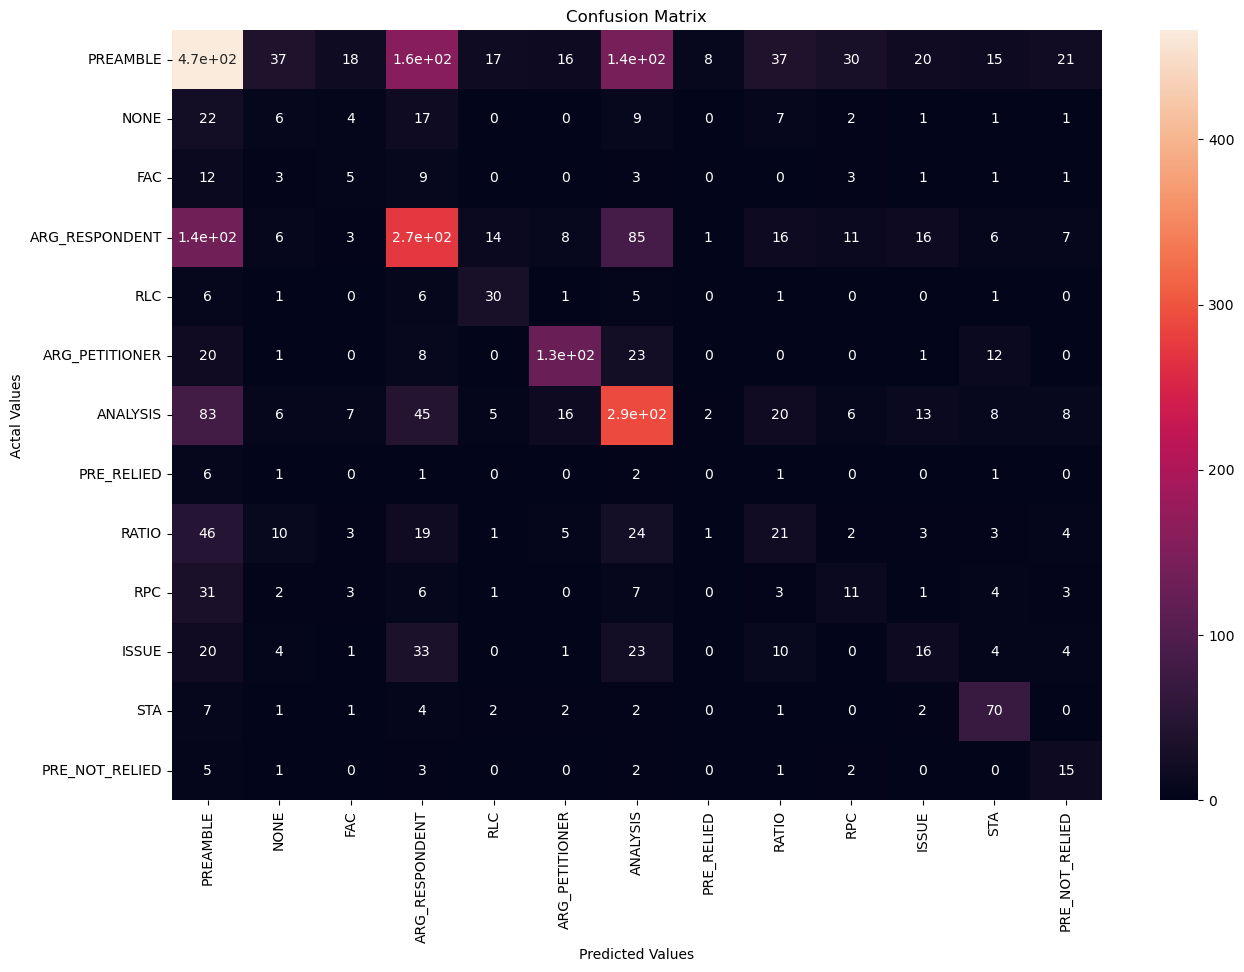

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
cm = confusion_matrix(labels_all_dev, preds_cos)

cm_df = pd.DataFrame(cm,
                     index = ['PREAMBLE', 'NONE', 'FAC', 'ARG_RESPONDENT', 'RLC', 'ARG_PETITIONER', 'ANALYSIS', 'PRE_RELIED', 'RATIO', 'RPC', 'ISSUE', 'STA', 'PRE_NOT_RELIED'], 
                     columns = ['PREAMBLE', 'NONE', 'FAC', 'ARG_RESPONDENT', 'RLC', 'ARG_PETITIONER', 'ANALYSIS', 'PRE_RELIED', 'RATIO', 'RPC', 'ISSUE', 'STA', 'PRE_NOT_RELIED'])

plt.figure(figsize=(15,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [58]:

# import spacy
# spacy.require_gpu()
# nlp=spacy.load('en_core_web_trf')

In [59]:
# !pip freeze

In [60]:
#@title
# ####### function to predict rhetorical roles
# from data_prep import split_preamble_judgement
# def predict_rhetorical_roles(input_txt):
#     preamble_txt,preamble_removed_txt  = split_preamble_judgement(input_txt)
#     cleaned_text = preamble_txt + preamble_removed_txt
#     custom_data = [  {"id": 1,"data": { "text": cleaned_text }}]
#     with open('datasets/custom_data.json','w') as file:
#       json.dump(custom_data,file)
    
#     !python infer_data_prep.py datasets/custom_data.json datasets/custom_processed_data.json
#     !python infer_new.py datasets/custom_processed_data.json datasets/custom_output.json datasets/model.pt

#     predictions = json.load(open('datasets/custom_output.json'))
#     sent_tags = []
#     annotation_list = predictions[0]['annotations'][0]['result']
#     for i,annotation in enumerate(annotation_list):
#       sent_tags.append((annotation['value']['text'],annotation['value']['labels'][0]))
#       if i < len(annotation_list)-1 and annotation_list[i+1]['value']['start'] > annotation['value']['end']:
#         sent_tags.append((cleaned_text[annotation['value']['end'] :annotation_list[i+1]['value']['start']],None))

#     return sent_tags

# ### sample input data 
# input_txt = '''                                                         REPORTABLE\n\n  IN THE SUPREME COURT OF INDIA\n CRIMINAL APPELLATE JURISDICTION\n\nCRIMINAL APPEAL NO. 1053 OF 2016\n\nNARESH KUMAR alias NITU                            ..........APPELLANT\n                                                   ......RESPONDENT\n                                           Versus\nSTATE OF HIMACHAL PRADESH\n\n                                       JUDGMENT\n NAVIN SINHA, J.\n The acquittal of the appellant by the Special Judge, Shimla in Sessions Trial No.7-S/7/2012, from the charge under Sections 20 and 61 of the Narcotic Drugs and Psychotropic Substances Act, 1985 (hereinafter referred as `the Act') has been reversed by the High Court. The appellant has been sentenced to fifteen years imprisonment and fine of Rs.2,00,000/-. Thus the present appeal.\n 2. The appellant is stated to have been apprehended at Majhotli, by the police party, on suspicion, at about 6.15 A.M.\nafter he disembarked from the State public transport bus going from Nerwa to Chamunda. Two kilograms of Charas is stated to have been recovered from a bag in his possession in presence of PW-2, Sita Ram an independent witness. DW-1 Shayam Singh, the depot in-charge at Nerwa, and DW-2 Khem Raj, the conductor of the bus in question were examined as defence witnesses.\n 3. After consideration of the entirety of the evidence, particularly that of PW-2 and DW-2, and also noticing that PW-1, Constable Rakesh Kumar, an eye-witness to the incident, had not been mentioned as a witness in the seizure memo Exhibit PW-1/B, the Special Judge opined that two theories had emerged with regard to the accusations against the appellant. The appellant was acquitted, giving him the benefit of doubt.\n 4. The High Court reversed the acquittal, holding that PW-2 had admitted his signatures on Exhibit PW-1/B, the bag along with the narcotic, Ex.PW-2/A seal impression, Ex.PW-2/D the arrest memo and the Ex.PW-2/E personal search memo. No complaint had been lodged by the witness that he had been compelled by the police to sign the documents under pressure.\nThe statements of the official witnesses, PW-1 Rakesh Kumar and PW-6 Head Constable Parmanand, were trustworthy, inspiring confidence, and could not be rejected only on the ground that they were police personnel. Any discrepancy with regard to distance and travelling time between Nerwa and Majhotli could be attributed to memory loss with passage of time, and was not required to be with mathematical precision. The time with regard to purchase of bus ticket had not been established.\n 5. Learned counsel for the appellant submits that he has been falsely implicated. He was deboarded from the bus at Chopal after it arrived from Majhotli and the narcotics planted on him. There had been no recovery from him. The bus ticket evidently reveals that he boarded the bus at 6:51 A.M. The question of his being apprehended at 6:15 A.M. simply does not arise. The road distance from Nerwa to Majhotli was 26 kms. as deposed by DW-1. In the hills, it would have taken the bus at least one hour or more, to cover this distance. The bus could not have reached Majhotli till 8:00 A.M. or thereafter. PW-2, the independent witness, deposed that he was stopped by the police at about 10.30 A.M. at Majhotli and after checking his motor cycle papers was allowed to leave. He was called to the Police Station at 1.00 P.M. and asked to put his signatures on certain documents. The witness denied any search, seizure and recovery from the appellant in his presence. If an independent witness was available, and relied upon by the prosecution, his evidence could not be discarded without reason, to hold that the police version was the truth. Additional submissions were made with regard to non-compliance with Section 50 of the Act, as there was personal search also, and that the complainant himself could not be the investigating officer. Reliance was placed on Basappa vs. State of Karnataka, 2014 (5) SCC 154 that if two views were possible, the acquittal ought not to have been interfered with in appeal.\n 6. We have considered the submissions on behalf of the parties, and also examined the evidence and other materials on record.\n 7. The public bus, on which the appellant was traveling, was going from Nerwa to Chamunda. The ticket issued to the appellant Exhibit DX, proved by the bus Conductor DW-2, bears the time of issuance 6.51 A.M., visible to the naked eye. The distance from Nerwa to Majhotli, is 26 kms. as deposed by DW-1.\nWe find substance in the submission on behalf of the appellant, that the travelling time for the bus, in the hills, for this distance would be one hour or more. Prima facie, the prosecution story that the appellant was apprehended at Majhotli at 6.15 A.M.\nbecomes seriously doubtful if not impossible. The bus would have reached Majhotli at about 8.00 A.M. or thereafter only. The conclusion of the High Court that passage of time, and memory loss, were sufficient explanation for the time difference, is held to be perverse, and without proper consideration of Exhibit DX.\nPW-2, the independent witness has stated that he was stopped at Majhotli by the police at 10.30 A.M. and was allowed to leave after verification of his motor cycle papers. The witness has specifically denied that the appellant was apprehended in his presence and that any search, seizure and recovery was conducted in his presence. He had deposed that he was called to the police station at 1:00 P.M. and asked to sign the papers. The witness was declared hostile. This aspect has not been considered by the High Court, which proceeded on the only assumption that the signatures were admitted.\n 8. In a case of sudden recovery, independent witness may not be available. But if an independent witness is available, and the prosecution initially seeks to rely upon him, it cannot suddenly discard the witness because it finds him inconvenient, and place reliance upon police witnesses only. In the stringent nature of the provisions of the Act, the reverse burden of proof, the presumption of culpability under Section 35, and the presumption against the accused under Section 54, any reliance upon Section 114 of the Evidence Act in the facts of the present case, can only be at the risk of a fair trial to the accused.\nKaramjit Singh vs. State (Delhi Administration), AIR 2003 SC 1311, is distinguishable on its facts as independent witness had refused to sign because of the fear of terrorists. Likewise S.\n Jeevananthanan vs. State, 2004(5) SCC 230, also does not appear to be a case where independent witnesses were available.\n 9. The presumption against the accused of culpability under Section 35, and under Section 54 of the Act to explain possession satisfactorily, are rebuttable. It does not dispense with the obligation of the prosecution to prove the charge beyond all reasonable doubt. The presumptive provision with reverse burden of proof, does not sanction conviction on basis of preponderance of probability. Section 35 (2) provides that a fact can be said to have been proved if it is established beyond reasonable doubt and not on preponderance of probability. That the right of the accused to a fair trial could not be whittled down under the Act was considered in Noor Aga vs. State of Punjab, (2008) 16 SCC 417, observing:- \"58......An initial burden exists upon the prosecution and only when it stands satisfied, would the legal burden shift. Even then, the standard of proof required for the accused to prove his innocence is not as high as that of the prosecution. Whereas the standard of proof required to prove the guilt of the accused on the prosecution is \"beyond all reasonable doubt\" but it is \"preponderance of probability\" on the accused. If the prosecution fails to prove the foundational facts so as to attract the rigours of Section 35 of the Act, the actus reus which is possession of contraband by the accused cannot be said to have been established.\n 59. With a view to bring within its purview the requirements of Section 54 of the Act, element of possession of the contraband was essential so as to shift the burden on the accused. The provisions being exceptions to the general rule, the generality thereof would continue to be operative, namely, the element of possession will have to be proved beyond reasonable doubt.\"\n 10. In the facts of the present case, and the nature of evidence as discussed, the prosecution had failed to establish the foundational facts beyond all reasonable doubt. The special judge committed no error in acquitting the appellant. The High Court ought not to have interfered with the same. The submissions regarding non-compliance with Section 50 of the Act, or that the complainant could not be the investigating officer are not considered necessary to deal with in the facts of the case.\n 11. In Basappa (supra), it was observed that the High Court before setting aside an order of acquittal was required to record a finding that the conclusions of the Trial Court were so perverse and wholly unreasonable, so as not to be a plausible view by misreading and incorrect appreciation of evidence. The conclusions of the High Court in the facts of the present case are more speculative, based on conjectures and surmises, contrary to the weight of the evidence on record.\n 12. The order of the High Court is set aside. The acquittal of the appellant ordered by the Special Judge is restored. The appellant is set at liberty forthwith, unless wanted in any other case. The appeal is allowed.\n ........................................J.\n                             (L. Nageswara Rao) .......................................J.\n                                     (Navin Sinha) New Delhi, July 27, 2017'''


# color_map={"PREAMBLE": "LightCyan", "FAC": "Yellow","RLC":"LightSkyBlue",
# "ISSUE":"Aquamarine","ARG_PETITIONER":"LightGreen","ARG_RESPONDENT":"Lavender","ANALYSIS":"Thistle","STA":"PaleGoldenrod","PRE_RELIED":"YellowGreen","PRE_NOT_RELIED":"Gold",
# "RATIO":"Orange","RPC":"PeachPuff","NONE":"Linen" }


# ########## launch Gradio UI
# iface = gr.Interface(
#     predict_rhetorical_roles,
#     [
#         gr.inputs.Textbox(
#             lines=20, default=input_txt)
#     ],
#     gr.outputs.HighlightedText(color_map))
# gradio_output = iface.launch()

# ########## play beep 
# from google.colab import output
# output.eval_js('new Audio("https://static.sfdict.com/audio/C07/C0702600.mp3").play()')